In [2]:
from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import scipy.io
from matplotlib import pyplot as plt
import seaborn
import math

In [3]:
# Reading in Rscore files by stack and concatenate them
Rscore = pd.read_csv('E:/projects/connectome/results/HurstExp_ARMA_results/Rscore/Rscore_1.csv')
Rscore = Rscore.rename(columns={'Unnamed: 0':'ID'})
Rscore = Rscore.set_index('ID')
for i in range(2,21):
    file = 'E:/projects/connectome/results/HurstExp_ARMA_results/Rscore/Rscore_'+str(i)+'.csv'
    tmp = pd.read_csv(file)
    tmp = tmp.rename(columns={'Unnamed: 0':'ID'})
    tmp = tmp.set_index('ID')
    Rscore = pd.concat([Rscore, tmp],sort=True)

In [4]:
# sort by subject ID and save to file
Rscore = Rscore.sort_index(axis=0)
Rscore.to_csv('E:/projects/connectome/results/HurstExp_ARMA_results/Rscore/Rscore_all.csv',index=True)

In [5]:
Rscore

,region 1,region 10,region 100,region 101,region 102,region 103,region 104,region 105,region 106,region 107,...,region 90,region 91,region 92,region 93,region 94,region 95,region 96,region 97,region 98,region 99
ID,,,,,,,,,,,,,,,,,,,,,
sub100206,0.577778,0.499567,0.236877,0.734088,0.588746,0.392808,0.343533,0.235192,0.509795,0.297801,...,0.150495,0.274362,0.146960,0.479305,0.400812,0.554257,0.223476,0.310247,0.140546,0.266089
sub100307,0.158970,0.115529,0.204814,0.754336,0.319410,0.345123,0.418674,0.160423,0.423491,0.235821,...,0.141427,0.272615,0.085426,0.205483,0.299554,0.466996,0.154099,0.238684,0.137808,0.251337
sub100408,0.512325,0.569544,0.096728,0.561145,0.480661,0.127104,0.152962,0.334564,0.482377,0.435996,...,0.148676,0.471044,0.167083,0.385619,0.486976,0.388404,0.166189,0.366597,0.258481,0.342660
sub100610,0.493200,0.356084,0.475077,0.605463,0.521259,0.304674,0.166119,0.184077,0.326222,0.513148,...,0.151427,0.213508,0.189256,0.417466,0.284429,0.636219,0.211406,0.301425,0.159687,0.157603
sub101006,0.211219,0.477625,0.553355,0.643060,0.263056,0.193794,0.335798,0.123288,0.127342,0.181051,...,0.113511,0.276871,0.187623,0.477632,0.450089,0.371634,0.161486,0.243900,0.112792,0.585100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub992673,0.360332,0.222595,0.484503,0.699027,0.405184,0.110415,0.220430,0.205992,0.174139,0.306590,...,0.096016,0.255639,0.265108,0.207263,0.324041,0.377919,0.191666,0.215318,0.492802,0.208620
sub992774,0.261387,0.329632,0.477020,0.485610,0.404330,0.368326,0.362416,0.248033,0.568988,0.335511,...,0.134614,0.255436,0.114225,0.410153,0.285895,0.474357,0.147779,0.257007,0.222999,0.148883
sub993675,0.208480,0.195626,0.585225,0.403053,0.419471,0.164312,0.260788,0.138072,0.235013,0.572503,...,0.161847,0.272917,0.143370,0.422217,0.134386,0.242520,0.171124,0.333232,0.153088,0.403724


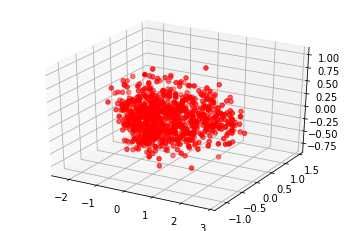

In [31]:
Rscore_pca = PCA(n_components=3).fit_transform(Rscore)
X_pca = list(Rscore_pca[i][0] for i in range(len(Rscore_pca)))
Y_pca = list(Rscore_pca[i][1] for i in range(len(Rscore_pca)))
Z_pca = list(Rscore_pca[i][2] for i in range(len(Rscore_pca)))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca, Y_pca, Z_pca, c='r', marker='o')
plt.show()

In [33]:
Rscore_tsne=TSNE(n_components=3, perplexity=25).fit_transform(Rscore)
Rscore_mds=MDS(n_components=2).fit_transform(Rscore)
Rscore_isomap=Isomap(n_components=2).fit_transform(Rscore)

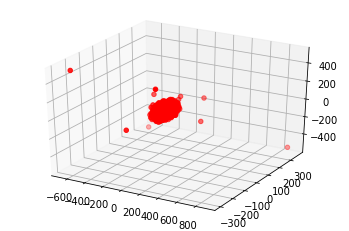

In [51]:
X_tsne = list(Rscore_tsne[i][0] for i in range(len(Rscore_tsne)))
Y_tsne = list(Rscore_tsne[i][1] for i in range(len(Rscore_tsne)))
Z_tsne = list(Rscore_tsne[i][2] for i in range(len(Rscore_tsne)))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne, Y_tsne, Z_tsne, c='r', marker='o')
plt.show()


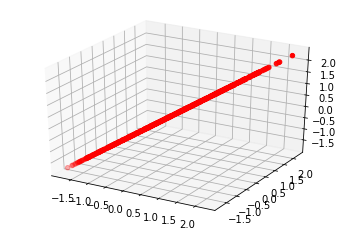

In [48]:
X_mds = list(Rscore_mds[i][0] for i in range(len(Rscore_mds)))
Y_mds = list(Rscore_mds[i][0] for i in range(len(Rscore_mds)))
Z_mds = list(Rscore_mds[i][0] for i in range(len(Rscore_mds)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_mds, Y_mds, Z_mds, c='r', marker='o')
plt.show()


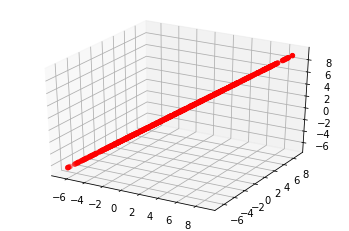

In [46]:
X_isomap = list(Rscore_isomap[i][0] for i in range(len(Rscore_isomap)))
Y_isomap = list(Rscore_isomap[i][0] for i in range(len(Rscore_isomap)))
Z_isomap = list(Rscore_isomap[i][0] for i in range(len(Rscore_isomap)))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_isomap, Y_isomap, Z_isomap, c='r', marker='o')
plt.show()


In [2]:
import pingouin as pg

D:\anaconda\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.4, the latest is 0.3.6.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [3]:
data = pg.read_dataset('icc')

In [4]:
data

,Wine,Judge,Scores
0,1,A,1
1,2,A,1
2,3,A,3
3,4,A,6
4,5,A,6
5,6,A,7
6,7,A,8
7,8,A,9
8,1,B,2
9,2,B,3
